# Exploratory Data Analysis (EDA)

In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from new_or_used import build_dataset

In [478]:
X_train, y_train, X_test, y_test = build_dataset()

In [479]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.Series(y_train)
y_test_df = pd.Series(y_test)

# 1. Understanding data structure

This dataset corresponds to MercadoLibre items available for sale between the **years 2013 and 2015** *(inferred from datetime features)*.

In [4]:
# Dataset size
n = len(X_train+X_test)
print(f"Provided dataset has {len(X_train_df.columns)} variables and {n} items")
print(f"It was splitted into {len(X_train_df)/n*100:.1f}% training and {len(X_test_df)/n*100:.1f}% test items")

Provided dataset has 45 variables and 100000 items
It was splitted into 90.0% training and 10.0% test items


## 1.1 Features

In [5]:
X_train_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition', 'deal_ids',
       'base_price', 'shipping', 'non_mercado_pago_payment_methods',
       'seller_id', 'variations', 'site_id', 'listing_type_id', 'price',
       'attributes', 'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [6]:
X_train_df.sample(5)  # Display a sample of the training data

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,...,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
83194,"{'country': {'name': 'Argentina', 'id': 'AR'},...","Se entrega en caja sellada, el cadete que lo e...",[],new,[],100.0,"{'local_pick_up': False, 'methods': [], 'tags'...",[],7835318510,[],MLA,bronze,100.0,[],buy_it_now,...,http://mla-s1-p.mlstatic.com/248401-MLA8500852...,Consolador Anal Plug Anal Mediano 13 X 4cm,False,2015-08-26T22:03:50.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1445810630000,active,None,NaN,None,1,1440626630000,http://articulo.mercadolibre.com.ar/MLA8500852...,0,1
7535,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],3000.0,"{'local_pick_up': False, 'methods': [], 'tags'...",[],8706577905,[{'attribute_combinations': [{'value_id': '920...,MLA,free,3000.0,"[{'value_id': 'female', 'attribute_group_id': ...",buy_it_now,...,http://mla-s1-p.mlstatic.com/592701-MLA2222034...,Cartera Jackie Smith De Cuero Graneado Color N...,False,2015-10-12T16:54:55.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1449852895000,active,None,NaN,None,1,1444668895000,http://articulo.mercadolibre.com.ar/MLA2222034...,0,1
35120,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],10000.0,"{'local_pick_up': False, 'methods': [], 'tags'...",[],6191545966,[],MLA,free,10000.0,[],buy_it_now,...,http://mla-s1-p.mlstatic.com/752501-MLA6534916...,Reloj Hombre Tag Heur,False,2015-09-05T00:33:34.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446597213000,paused,None,NaN,None,1,1441413213000,http://articulo.mercadolibre.com.ar/MLA6534916...,0,1
73458,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sí,[],used,[],1800.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5468194559,[],MLA,bronze,1800.0,[],buy_it_now,...,http://mla-s1-p.mlstatic.com/747201-MLA9903613...,Roca Mineral Geoda Cristales Cuarzo Amatista A...,False,2015-08-24T04:05:24.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1445573124000,active,None,NaN,None,1,1440389124000,http://articulo.mercadolibre.com.ar/MLA9903613...,0,1
53528,"{'country': {'name': 'Argentina', 'id': 'AR'},...","LOS LIBROS SON REVISADOS ANTES DE PUBLICAR, PO...",[],used,[],50.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",7242452883,[],MLA,free,50.0,[],buy_it_now,...,http://mla-s1-p.mlstatic.com/11259-MLA29622537...,Pablo Rojas Paz - Campo Argentino. Vida Y Cost...,False,2015-09-23T23:50:03.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448236203000,active,None,NaN,None,1,1443052203000,http://articulo.mercadolibre.com.ar/MLA2962253...,0,1


In [7]:
# There are too many columns to display all at once, so we will show a subset
X_train_df[['buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail']].sample(5)

,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail
75942,buy_it_now,[dragged_bids_and_visits],,MLA6866095440,[],MLA3067,[{'id': 'MLA1448719386-921443155'}],2015-09-15T19:44:59.000Z,none,"[{'size': '329x500', 'secure_url': 'https://a2...",MLA1448719386,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/20848-MLA14487193...
39765,buy_it_now,[dragged_bids_and_visits],,MLA7515247153,[],MLA40547,[{'id': 'MLA8570917174-914549902'}],2015-09-08T02:33:31.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA8570917174,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/20681-MLA85709171...
49454,buy_it_now,[dragged_bids_and_visits],,MLA3452753860,[],MLA35923,[],2015-10-09T15:15:16.000Z,none,"[{'size': '500x328', 'secure_url': 'https://a2...",MLA3859544939,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/6215-MLA385954493...
21858,buy_it_now,[dragged_bids_and_visits],,MLA6031767747,[],MLA26536,[{'id': 'MLA3241351421-911701567'}],2015-09-18T13:20:39.000Z,none,"[{'size': '500x373', 'secure_url': 'https://a2...",MLA3241351421,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/4478-MLA324135142...
82016,buy_it_now,[],,None,[],MLA369716,[{'id': 'MLA8985754063-900406196'}],2015-08-25T15:29:40.000Z,none,"[{'size': '500x500', 'secure_url': 'https://a2...",MLA8985754063,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/555701-MLA8985754...


Probably, `condition` feature should be deleted because it's the actual target. This hypotesis have to be checked first.

`international_delivery_mode` has a wrong 'none' value so it needs to be corrected.

In [8]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   seller_address                    90000 non-null  object 
 1   warranty                          35243 non-null  object 
 2   sub_status                        90000 non-null  object 
 3   condition                         90000 non-null  object 
 4   deal_ids                          90000 non-null  object 
 5   base_price                        90000 non-null  float64
 6   shipping                          90000 non-null  object 
 7   non_mercado_pago_payment_methods  90000 non-null  object 
 8   seller_id                         90000 non-null  int64  
 9   variations                        90000 non-null  object 
 10  site_id                           90000 non-null  object 
 11  listing_type_id                   90000 non-null  object 
 12  pric

Dataset is formed by:
- **IDs:** `id`,`parent_item_id`, `official_store_id`, `category_id`, `site_id`, `video_id`, `catalog_product_id`, `deal_ids`, `seller_id`, `descriptions`
- **Price-related variables:** `price`, `original_price`, `base_price`
- **Transaction-related variables:**  `currency_id`, `accepts_mercadopago`, `warranty`
- **Quantity-related variables:** `initial_quantity`, `sold_quantity`, `available_quantity`
- **Post-related variables:** `title`, `thumbnail`, `pictures`, `permalink`, `secure_thumbnail`, `status`, `sub_status`, `buying_mode`, `condition`, `automatic_relist`
- **Time-related variables:** `start_time`, `stop_time`, `date_created`, `last_updated`
- **Seller-related variables:** `seller_address`, `listing_type_id`
- **Tags:** `tags`, `variations`, `shipping`, `attributes`, `non_mercado_pago_payment_methods`

As common practice, ID variables will be ignored during feature selection. Also, time-related variables won't be used.

In [9]:
X_train_df['id'].describe()

count             90000
unique            90000
top       MLA4695330653
freq                  1
Name: id, dtype: object

In [10]:
X_train_df['parent_item_id'].describe()

count             69310
unique            69310
top       MLA6553902747
freq                  1
Name: parent_item_id, dtype: object

Probably, `parent_item_id` is pointing to item's `id`, because they follow the same code structure *'MLA' + identifier* (int, 10)

### Identifying Missing Values

For some variables, we have missing values.

**Some nulls:**
1. `parent_item_id` (23.0%)
1. `warranty` (60.8%)

**Almost empty:**
1. `video_id` (97.0%)
1. `official_store_id` (99.2%)
1. `original_price` (99.9%)
1. `catalog_product_id` (~100%)

**No data:**
1. `differential_pricing`
1. `subtitle`

At a first glance, it looks like many features are null but have some content '[]', so they'll not be displayed as null by `.info()`.

In [11]:
X_train_df['sub_status'].describe()

count     90000
unique        4
top          []
freq      89109
Name: sub_status, dtype: object

In [12]:
# Showing options for 'sub_status'
X_train_df['sub_status'].value_counts()

sub_status
[]             89109
[suspended]      871
[expired]         13
[deleted]          7
Name: count, dtype: int64

We can see that `sub_status` marks a few cases as suspended, expired, or deleted. These items should be removed from the dataset.

In [13]:
X_train_df['deal_ids'].describe()

count     90000
unique       31
top          []
freq      89783
Name: deal_ids, dtype: object

In [14]:
X_train_df['variations'].describe()

count     90000
unique     7375
top          []
freq      82626
Name: variations, dtype: object

In [15]:
X_train_df['attributes'].describe()

count     90000
unique     3118
top          []
freq      78850
Name: attributes, dtype: object

In [16]:
X_train_df['tags'].describe()

count                         90000
unique                            8
top       [dragged_bids_and_visits]
freq                          65315
Name: tags, dtype: object

In [17]:
# Flatten all tag lists and get unique tag values
unique_tags = set(tag for tags_list in X_train_df['tags'] for tag in tags_list)
print(unique_tags)

{'good_quality_thumbnail', 'dragged_bids_and_visits', 'dragged_visits', 'poor_quality_thumbnail', 'free_relist'}


It seems we only have 5 relevant values for 'tags'.

So, it's plausible to assume that the remaining 3 appearing values are related with an empty field (NaN).

It'll be explored later.

In [18]:
X_train_df['listing_source'].describe()

count     90000
unique        1
top            
freq      90000
Name: listing_source, dtype: object

In [19]:
X_train_df['coverage_areas'].describe()

count     90000
unique        1
top          []
freq      90000
Name: coverage_areas, dtype: object

It's been verified that most of these features has '[]' instead of 'NaN'. It has to be modified.

***Conflictive Features:*** coverage_areas, listing_source, tags, attributes, variations, deal_ids, sub_status

Both `listing_source` and `coverage_areas` are completely empty. The others have between 87% up to 99% nulls.

---

### Variables distribution

In [20]:
# Descriptive statistics for numeric features
X_train_df.describe(include=['number'])

,base_price,seller_id,price,official_store_id,original_price,stop_time,catalog_product_id,initial_quantity,start_time,sold_quantity,available_quantity
count,9.000000e+04,9.000000e+04,9.000000e+04,745.000000,130.000000,9.000000e+04,7.000000e+00,90000.000000,9.000000e+04,90000.000000,90000.000000
mean,5.781341e+04,5.487386e+09,5.781352e+04,5802.018792,1492.522308,1.447648e+12,2.895700e+06,34.957178,1.442383e+12,2.328044,34.700767
std,9.089555e+06,2.587140e+09,9.089555e+06,2657.056302,1954.905741,3.251040e+09,1.919771e+06,421.091981,2.122683e+09,33.839328,420.811703
min,8.400000e-01,1.000319e+09,8.400000e-01,1024.000000,120.000000,1.444823e+12,9.440400e+04,1.000000,1.369110e+12,0.000000,1.000000
25%,9.000000e+01,3.184875e+09,9.000000e+01,3590.000000,449.000000,1.446313e+12,1.925518e+06,1.000000,1.441144e+12,0.000000,1.000000
50%,2.500000e+02,5.512496e+09,2.500000e+02,6158.000000,850.000000,1.447643e+12,3.051112e+06,1.000000,1.442524e+12,0.000000,1.000000
75%,8.000000e+02,7.704930e+09,8.000000e+02,8216.000000,1500.000000,1.448930e+12,4.073615e+06,2.000000,1.443800e+12,0.000000,2.000000
max,2.222222e+09,9.999853e+09,2.222222e+09,9996.000000,12248.000000,1.730732e+12,5.126117e+06,9999.000000,1.444900e+12,6065.000000,9999.000000


In [21]:
# Descriptive statistics for bool features
X_train_df.describe(include=['bool'])

,accepts_mercadopago,automatic_relist
count,90000,90000
unique,2,2
top,True,False
freq,88018,85773


**Observations:**

* **Price Discrepancy & Outliers**: The `base_price` and `price` columns show extreme outliers and a heavily right-skewed distribution, where the majority of products are inexpensive, but a few are exceptionally high-priced.
* **Seller Diversity**: The dataset covers a wide range of sellers.
* **Lack of Official Store & Catalog Data**: Most products are not from official stores nor linked to specific catalog product IDs, indicating a diverse marketplace with many independent sellers and general listings.
* **Sparse Discount Information**: `original_price` is rarely recorded, suggesting that discounts aren't a primary feature in the majority of these listings.
* **Inventory & Sales Distribution**: While most listings have low initial and available quantities and sell few items, there are some high-volume listings that significantly impact the average `initial_quantity`, `sold_quantity`, and `available_quantity`. This suggests a "power law" distribution typical of sales data, where a small percentage of listings account for a large percentage of sales.

In [22]:
# Descriptive statistics for string features
# NOTE: Due to the large number of columns and rows, we will sample a subset of the data
X_train_df.sample(int(len(X_train_df)*0.2)).describe(include=['object']) # pd.describe() for 'objects' is a time consuming process

,seller_address,warranty,sub_status,condition,deal_ids,shipping,non_mercado_pago_payment_methods,variations,site_id,listing_type_id,attributes,buying_mode,tags,listing_source,parent_item_id,...,descriptions,last_updated,international_delivery_mode,pictures,id,differential_pricing,currency_id,thumbnail,title,date_created,secure_thumbnail,status,video_id,subtitle,permalink
count,18000,7092,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,13852,...,18000,18000,18000,18000,18000,0,18000,18000,18000,18000,18000,18000,514,0,18000
unique,1729,2819,4,2,16,23,88,1543,1,7,650,3,7,1,13852,...,17513,17831,1,17854,18000,0,2,17846,17906,17443,17846,3,401,0,18000
top,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sí,[],new,[],"{'local_pick_up': True, 'methods': [], 'tags':...",[],[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],,MLA8382557405,...,[],2015-09-18T13:23:33.000Z,none,[],MLA5580061422,NaN,ARS,,50 Suspensores Para Short De Baño Tela Calada,2015-09-16T22:27:19.000Z,,active,QQNfOicE_o8,NaN,http://articulo.mercadolibre.com.ar/MLA5580061...
freq,746,1039,17855,9613,17962,7593,5598,16458,18000,11382,15729,17487,13041,18000,1,...,488,3,18000,147,1,NaN,17912,147,14,4,147,17243,54,NaN,1


In [23]:
X_train_df['status'].unique()

array(['active', 'paused', 'closed', 'not_yet_active'], dtype=object)

In [24]:
X_train_df['seller_address'].sample().to_list()

[{'country': {'name': 'Argentina', 'id': 'AR'},
  'state': {'name': 'Capital Federal', 'id': 'AR-C'},
  'city': {'name': 'Caballito', 'id': 'TUxBQkNBQjM4MDda'}}]

In [25]:
X_train_df['status'].describe()

count      90000
unique         4
top       active
freq       86116
Name: status, dtype: object

### Unique values

In [26]:
def create_unique_value_lists(df: pd.DataFrame) -> dict:
    """
    Creates a dictionary of unique values for each column in a DataFrame,
    but only if the number of unique values in a column is less than 16.

    Args:
        df: The input pandas DataFrame.

    Returns:
        A dictionary where keys are column names and values are lists of
        unique values for those columns, subject to the condition.
    """
    unique_values_dict = {}
    for column in df.columns:
        # Check if the column contains dictionaries or other unhashable types
        # and convert them to strings for unique() to work.
        # This is a robust way to handle mixed types or potential unhashable objects.
        if df[column].apply(lambda x: isinstance(x, (dict, list, set))).any():
            unique_vals = df[column].astype(str).unique()
        else:
            unique_vals = df[column].unique()

        if len(unique_vals) < 16:
            unique_values_dict[column] = unique_vals.tolist()
    return unique_values_dict

In [27]:
X_train_df['listing_source'].unique()

array([''], dtype=object)

In [28]:
# Get unique values for each column with less than 16 unique values
filtered_unique_values = create_unique_value_lists(X_train_df)
filtered_unique_values = sorted(filtered_unique_values.items(), key=lambda x: len(x[1]), reverse=False)

print("Unique values (with less than 16 possibilities):")
for col, values in filtered_unique_values:
    print(f"Column '{col}': {values}")

Unique values (with less than 16 possibilities):
Column 'site_id': ['MLA']
Column 'listing_source': ['']
Column 'coverage_areas': ['[]']
Column 'international_delivery_mode': ['none']
Column 'differential_pricing': [None]
Column 'subtitle': [None]
Column 'condition': ['new', 'used']
Column 'accepts_mercadopago': [True, False]
Column 'currency_id': ['ARS', 'USD']
Column 'automatic_relist': [False, True]
Column 'buying_mode': ['buy_it_now', 'classified', 'auction']
Column 'sub_status': ['[]', "['suspended']", "['expired']", "['deleted']"]
Column 'status': ['active', 'paused', 'closed', 'not_yet_active']
Column 'listing_type_id': ['bronze', 'silver', 'free', 'gold_special', 'gold', 'gold_premium', 'gold_pro']
Column 'tags': ["['dragged_bids_and_visits']", '[]', "['good_quality_thumbnail', 'dragged_bids_and_visits']", "['good_quality_thumbnail']", "['dragged_visits']", "['dragged_visits', 'free_relist']", "['poor_quality_thumbnail', 'dragged_bids_and_visits']", "['poor_quality_thumbnail']"

In [29]:
X_train_df['tags'].value_counts()

tags
[dragged_bids_and_visits]                            65315
[]                                                   22412
[good_quality_thumbnail, dragged_bids_and_visits]     1191
[dragged_visits]                                       464
[good_quality_thumbnail]                               346
[dragged_visits, free_relist]                          259
[poor_quality_thumbnail, dragged_bids_and_visits]       10
[poor_quality_thumbnail]                                 3
Name: count, dtype: int64

**Observations:**
- It looks like `tags` work as a list of strings that specify every tag that applies to that item.
- It appears that `site_id` is always 'MLA'.
- Some are binary features: `condition`, `currency_id`, `automatic_relist`
- `catalog_product_id` is almost empty (just a few items with data).

For this dataset, `site_id` doesn't add any information because it's 'MLA' value for every item. Therefore, it won't be used.

In [30]:
X_train_df['site_id'].describe()

count     90000
unique        1
top         MLA
freq      90000
Name: site_id, dtype: object

### Outliers

### Correlation

In [31]:
# Get the numerical columns
numerical_features = X_train_df.select_dtypes(include=['number']).columns.tolist()

print("Numerical features for filtering:")
print(numerical_features)

Numerical features for filtering:
['base_price', 'seller_id', 'price', 'official_store_id', 'original_price', 'stop_time', 'catalog_product_id', 'initial_quantity', 'start_time', 'sold_quantity', 'available_quantity']


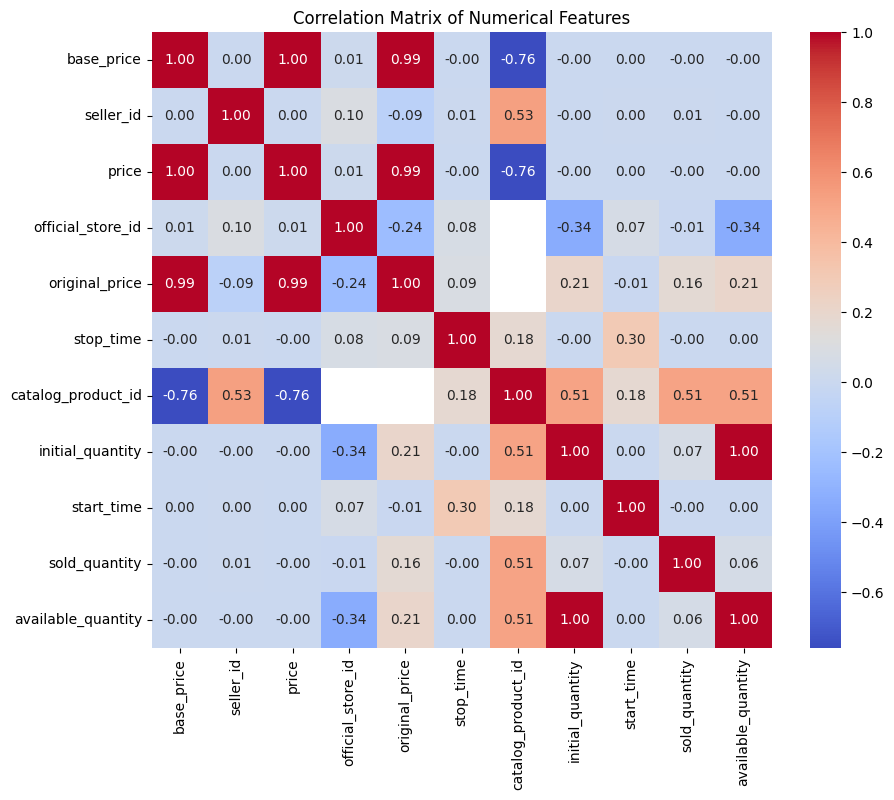

In [32]:
# Compute correlation matrix for numerical features
corr_matrix = X_train_df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Observations:**
- ***Linear correlation:***
    - best_price/price/original_price
    - initial_quantity/available_quantity
- ***Positive correlation:***
    1. catalog_product_id/seller_id
    1. catalog_product_id/initial_quantity/sold_quantity/available_quantity
    1. start_time/stop_time
    1. original_price/initial_quantity/available_quantity/sold_quantity
    1. start_time/catalog_product_id
- ***Negative correlation:***
    1. catalog_product_id/price/base_price
    1. official_store_id/initial_quantity/available_quantity
    1. official_store_id/original_price

**Insights:**
- High correlation between different price & quantity variables is expectable.
- Both `catalog_product_id` & `official_store_id` have a strong negative correlation with price & quantity variables. However, these features had a lot of null values, then they won't be useful for inference.



## 1.2 Target variable

In [33]:
# Target variable distribution
y_train_df.describe()

count     90000
unique        2
top         new
freq      48352
dtype: object

In [34]:
X_train_df['condition'].describe()

count     90000
unique        2
top         new
freq      48352
Name: condition, dtype: object

In [35]:
detected = False
for i, row in enumerate(X_train_df['condition']):
    if row == y_train_df.iloc[i]:
        pass
    else:
        print(f"Mismatch at index {i}:", row)
        detected = True
if not detected:
    print("No mismatches detected between 'condition' and target variable.")

No mismatches detected between 'condition' and target variable.


In [36]:
X_test_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'deal_ids', 'base_price',
       'shipping', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

As we verified, the column `condition` is effectively the target value. We will remove it from dataset.

Actually, it should've been removed by the `new_or_used.py` script, but it seems that feature was forgotten for the test split.

The `build_dataset()` function should be fixed to delete it previously.

In [37]:
# Remove 'condition' column as it is the target variable
del X_train_df['condition']

In [38]:
X_train_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'deal_ids', 'base_price',
       'shipping', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

## 1.3 Visualization

In [ ]:
# Store all features in a list
show_features = X_train_df.columns.tolist()
id_variables = ['id', 'parent_item_id', 'official_store_id', 'category_id', 'site_id', 'video_id', 'catalog_product_id', 'deal_ids', 'seller_id', 'descriptions']
# Remove specific features that are not needed for the analysis
[show_features.remove(x) for x in (id_variables)]

# Concat with target
y_train_df.name = 'target'
visual_df = pd.concat([X_train_df[show_features], y_train_df], axis=1)

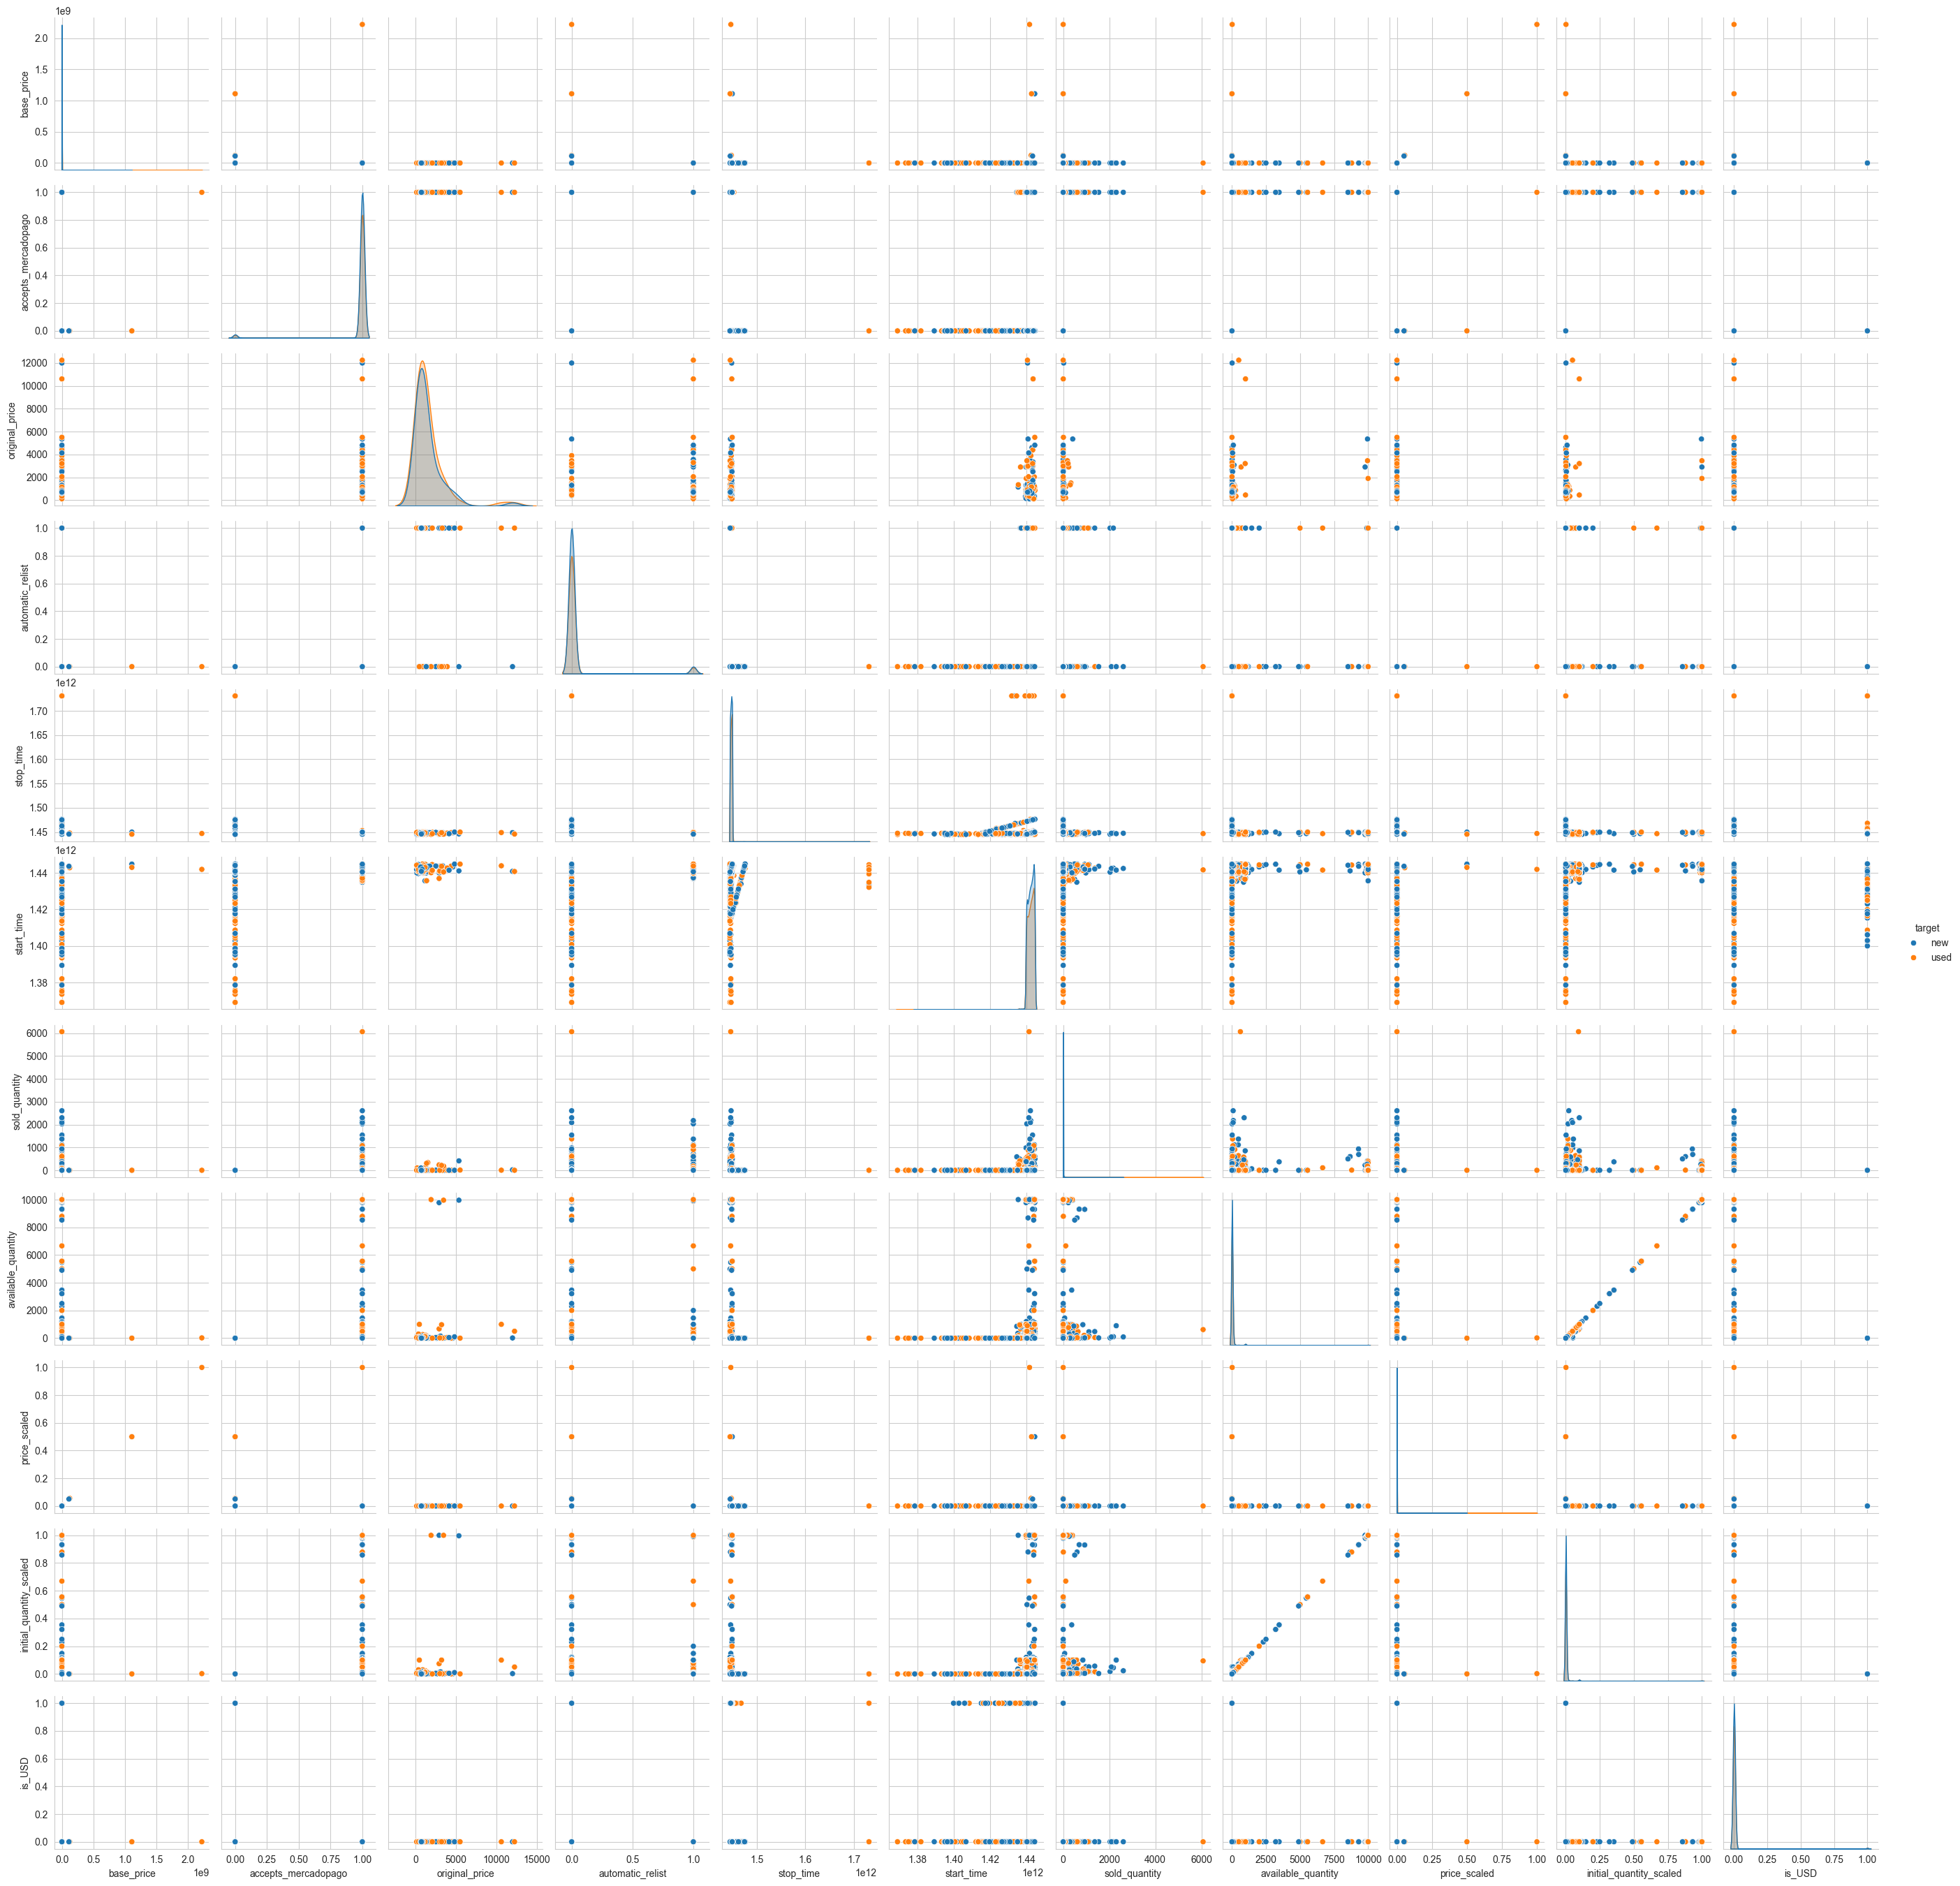

In [ ]:
# Create the pair plot
sns.pairplot(visual_df, hue='target')

# Display the plot
plt.show()

In [168]:
X_train_df['stop_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 89109 entries, 0 to 89108
Series name: stop_time
Non-Null Count  Dtype
--------------  -----
89109 non-null  int64
dtypes: int64(1)
memory usage: 696.3 KB


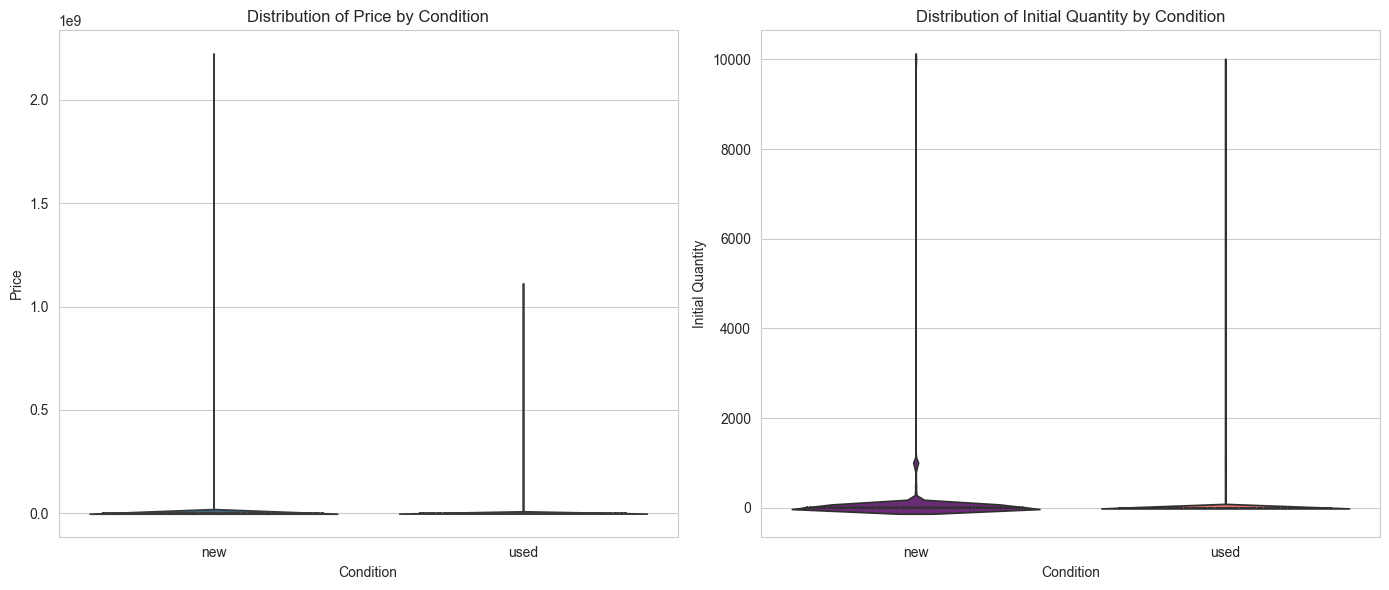

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# --- Plot for 'price' ---
plt.subplot(1, 2, 1) # This creates a 1-row, 2-column grid and selects the 1st plot
sns.violinplot(
    x=y_train_df,
    y='price',
    data=X_train_df,
    hue=y_train_df,
    palette='viridis',
    inner='quartile'    # Displays quartiles within the violins for more detail
)
plt.title('Distribution of Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')

# --- Plot for 'initial_quantity' ---
plt.subplot(1, 2, 2)
sns.violinplot(
    x=y_train_df,
    y='initial_quantity',
    data=X_train_df,
    hue=y_train_df,
    palette='magma',
    inner='quartile'
)
plt.title('Distribution of Initial Quantity by Condition')
plt.xlabel('Condition')
plt.ylabel('Initial Quantity')

plt.tight_layout()

# Save the plot to a file
#plt.savefig('two_sided_violin_plots.png')

plt.show()

Both features are heavily skewed, with many outliers on the upper side.

What's more, `price` also shows some imbalance between classes.

In [ ]:
# Time formats
X_train_df[['start_time','stop_time','date_created']]

,start_time,stop_time,date_created
0,1441485773000,1446669773000,2015-09-05T20:42:53.000Z
1,1443290910000,1448474910000,2015-09-26T18:08:30.000Z
2,1441843027000,1447027027000,2015-09-09T23:57:07.000Z
3,1443466076000,1449191596000,2015-09-28T18:47:56.000Z
4,1440454040000,1445638040000,2015-08-24T22:07:20.000Z
...,...,...,...
89104,1443793010000,1448977010000,2015-10-02T13:36:50.000Z
89105,1442964621000,1448148621000,2015-09-22T23:30:21.000Z
89106,1440452031000,1445636031000,2015-08-24T21:33:51.000Z
89107,1443813656000,1448997656000,2015-10-02T19:20:56.000Z


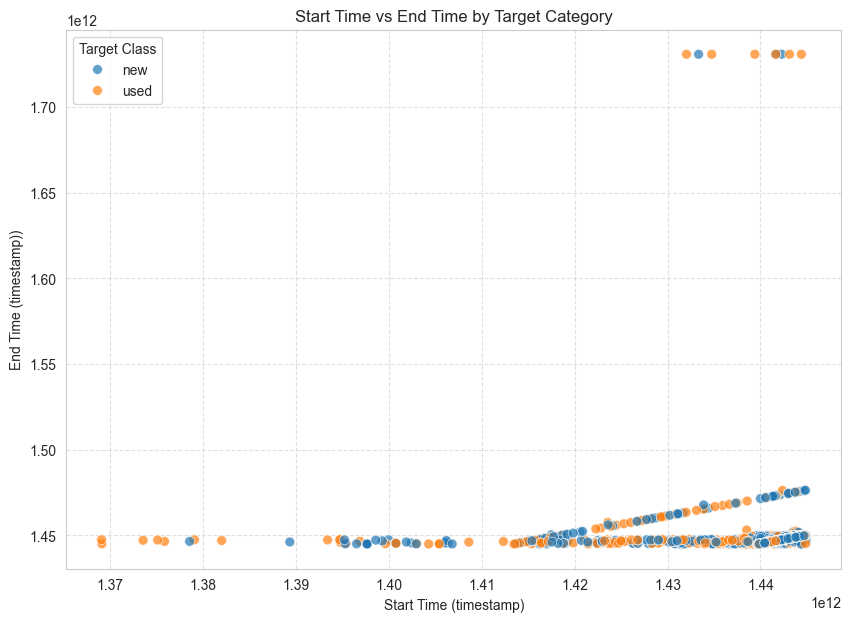

In [197]:
# Convert target to a categorical type for hue 
visual_df['target'] = visual_df['target'].astype('category')

plt.figure(figsize=(10, 7)) # Set a good figure size
sns.scatterplot(data=visual_df, x='start_time', y='stop_time', hue='target', s=50, alpha=0.7)

plt.title('Start Time vs End Time by Target Category')
plt.xlabel('Start Time (timestamp)')
plt.ylabel('End Time (timestamp))')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Target Class')
plt.show()

# 2. Feature Engineering

In [40]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.Series(y_train)
y_test_df = pd.Series(y_test)

In [41]:
# Remove 'condition' column as it is the target variable
del X_train_df['condition']

## Removing empty values

In [42]:
empty_columns = ['differential_pricing', 'subtitle', 'listing_source', 'coverage_areas','international_delivery_mode']
X_train_df[empty_columns].describe()

,differential_pricing,subtitle,listing_source,coverage_areas,international_delivery_mode
count,0,0,90000,90000,90000
unique,0,0,1,1,1
top,NaN,NaN,,[],none
freq,NaN,NaN,90000,90000,90000


In [43]:
# Remove empty columns
X_train_df.drop(columns=empty_columns, inplace=True)
y_train_df.drop(columns=empty_columns, inplace=True)

# Apply the same transformation to the test set
X_test_df.drop(columns=empty_columns, inplace=True)
y_test_df.drop(columns=empty_columns, inplace=True)

## Missing Values handling
- Nulls: `parent_item_id`, `warranty`
- empty list ('[]'): `sub_status`, `tags`

### Nulls
We have previously detected missing values for `parent_item_id` and `warranty`, but these features won't be taken in consideration, so handling missing values is no needed by now.

### Empty lists
Some features has '[]' values. Let's analyze how to handle it.

In [44]:
X_train_df['sub_status'].astype(str).unique()

array(['[]', "['suspended']", "['expired']", "['deleted']"], dtype=object)

This data could add noise to our model because it realtes to not-active items, so those would be deleted and then `sub_status` column will be also removed.

In [45]:
# Remove items where 'sub_status' contains any data (not active items)
original = len(X_train_df)
mask = X_train_df['sub_status'].astype(str) == '[]'
X_train_df = X_train_df[mask]
y_train_df = y_train_df[mask]
cleaned = len(X_train_df)
print(f"Removed {original - cleaned} items ({cleaned/original-1:.2%}) with 'sub_status' data.")

Removed 891 items (-0.99%) with 'sub_status' data.


In [46]:
# Apply the same transformation to the test set
original = len(X_test_df)
mask = X_test_df['sub_status'].astype(str) == '[]'
X_test_df = X_test_df[mask]
y_test_df = y_test_df[mask]
cleaned = len(X_test_df)
print(f"Removed {original - cleaned} items ({cleaned/original-1:.2%}) with 'sub_status' data (test split).")

Removed 95 items (-0.95%) with 'sub_status' data (test split).


In [47]:
# Double check if values were removed correctly
X_train_df['sub_status'].astype(str).unique()

array(['[]'], dtype=object)

In [48]:
# 'sub_status' is no longer needed, so we can drop it
X_train_df.drop(columns=['sub_status'], inplace=True)
X_test_df.drop(columns=['sub_status'], inplace=True)

X_train_df.reset_index(drop=True, inplace=True)
X_test_df.reset_index(drop=True, inplace=True)

## Outliers handling

### Manual exclusion

It was noticed that many items have nonsensical prices.

In [480]:
X_train_df['price'].sort_values(ascending=False).head(15)

53241    2.222222e+09
10891    1.111111e+09
36137    1.111111e+09
62854    1.234568e+08
69028    1.121111e+08
27166    1.111111e+07
15783    1.111111e+07
4201     1.111111e+07
56269    9.000000e+06
43769    8.888888e+06
78341    6.500000e+06
1273     5.330000e+06
79066    3.956000e+06
71341    2.648840e+06
3190     2.500000e+06
Name: price, dtype: float64

By doing a visual inspection, we can assume that values higher than 6.5 M are actually off-market (e.g., test items, not real selling items).

Then, we have to filter them out.

In [481]:
# Remove extreme prices (equivalent to ~650k USD at 2015)
X_train_df['price'] = X_train_df['price'][X_train_df['price'] <= 6.5e6]
X_test_df['price'] = X_test_df['price'][X_test_df['price'] <= 6.5e6]

In [482]:
X_train_df = X_train_df.dropna(subset=['price'])
X_test_df = X_test_df.dropna(subset=['price'])

In [483]:
X_train_df['price'].sort_values(ascending=False).head(15)

78341    6500000.0
1273     5330000.0
79066    3956000.0
71341    2648840.0
3190     2500000.0
36548    2300000.0
60010    2050000.0
41416    2004105.0
82609    1919000.0
73029    1800000.0
72807    1720000.0
27234    1700000.0
19192    1690000.0
4222     1628005.0
25158    1559237.0
Name: price, dtype: float64

In [484]:
X_train_df['price'].describe()

count    8.999000e+04
mean     5.244828e+03
std      5.457368e+04
min      8.400000e-01
25%      9.000000e+01
50%      2.500000e+02
75%      8.000000e+02
max      6.500000e+06
Name: price, dtype: float64

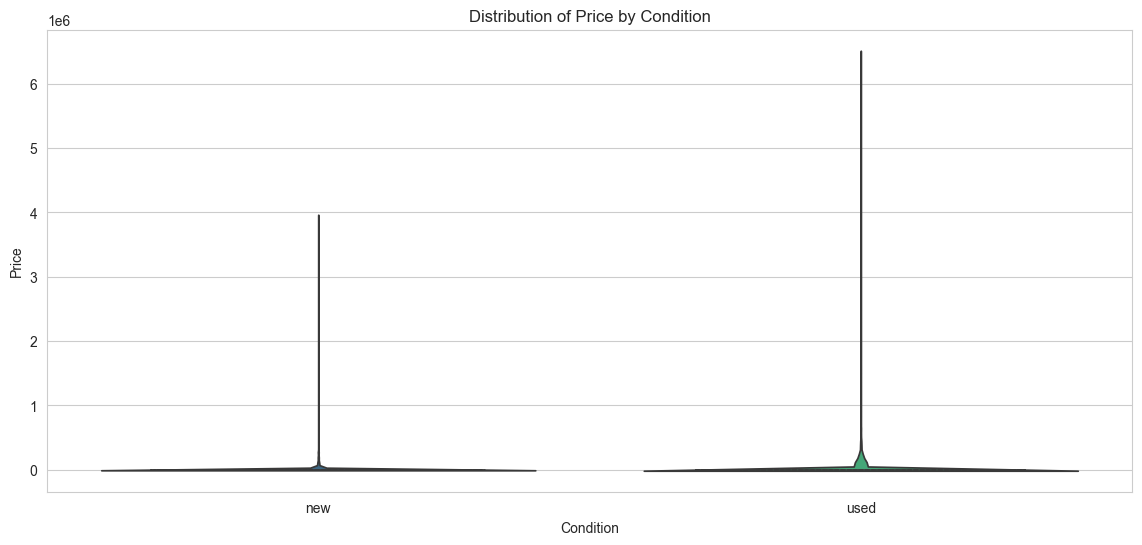

In [485]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# --- Plot for 'price' ---
plt.subplot(1, 1, 1) # This creates a 1-row, 2-column grid and selects the 1st plot
sns.violinplot(
    x=y_train_df,
    y='price',
    data=X_train_df,
    hue=y_train_df,
    palette='viridis',
    inner='quartile'    # Displays quartiles within the violins for more detail
)
plt.title('Distribution of Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

Even after removing those values, the distribution is still skewed. The next step is applying some automatic cleaning using statistical methods (IQR).

### Interquartile Range (IQR)

In [388]:
def remove_outliers_iqr(data: list[pd.DataFrame], column: str, iqr_factor: float = 1.5) -> list[pd.DataFrame]:
    """
    Removes outliers from a specified column in a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the numerical column to remove outliers from.
        iqr_factor (float): The multiplier for the IQR to define outlier bounds (default is 1.5).

    Returns:
        list[pd.DataFrame]: A list with new DataFrames for every split with outliers removed from the specified column.
    """
    df_train = data[0]
    df_test = data[1]

    if column not in df_train.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR

    # Filter out the outliers
    df_train_cleaned = df_train[(df_train[column] >= lower_bound) & (df_train[column] <= upper_bound)]
    df_test_cleaned = df_test[(df_test[column] >= lower_bound) & (df_test[column] <= upper_bound)]

    print(f"Outliers removed from '{column}' using IQR method (bounds: {lower_bound}<->{upper_bound}):")
    print(f"\nTRAIN SPLIT:")
    print(f"  Original rows: {len(df_train)}")
    print(f"  Rows after outlier removal: {len(df_train_cleaned)}")
    print(f"  Outliers removed: {len(df_train) - len(df_train_cleaned)}")

    print("\nTEST SPLIT:")
    print(f"  Original rows: {len(df_test)}")
    print(f"  Rows after outlier removal: {len(df_test_cleaned)}")
    print(f"  Outliers removed: {len(df_test) - len(df_test_cleaned)}")

    return [df_train_cleaned, df_test_cleaned]

In [389]:
continuous_features = ['price', 'initial_quantity']

# Initialize the DataFrame that will store the cumulatively filtered data.
X_train_outlier_df = X_train_df.copy()
X_test_outlier_df = X_test_df.copy()

for feature in continuous_features:
    X_train_outlier_df, X_test_outlier_df = remove_outliers_iqr([X_train_outlier_df,X_test_outlier_df], feature, iqr_factor=1.5)
    print('\n')

Outliers removed from 'price' using IQR method (bounds: -975.0<->1865.0):

TRAIN SPLIT:
  Original rows: 89990
  Rows after outlier removal: 76913
  Outliers removed: 13077

TEST SPLIT:
  Original rows: 10000
  Rows after outlier removal: 8451
  Outliers removed: 1549


Outliers removed from 'initial_quantity' using IQR method (bounds: -2.0<->6.0):

TRAIN SPLIT:
  Original rows: 76913
  Rows after outlier removal: 64813
  Outliers removed: 12100

TEST SPLIT:
  Original rows: 8451
  Rows after outlier removal: 7080
  Outliers removed: 1371




In [390]:
X_train_df['price'].sort_values(ascending=False)

78341    6500000.00
1273     5330000.00
79066    3956000.00
71341    2648840.00
3190     2500000.00
            ...    
23833          1.00
66428          1.00
76586          1.00
8066           1.00
84348          0.84
Name: price, Length: 89990, dtype: float64

In [391]:
X_train_outlier_df['price'].sort_values(ascending=False)

53025    1865.00
77037    1864.16
36485    1864.00
89857    1860.00
41486    1860.00
          ...   
23833       1.00
8066        1.00
81499       1.00
33027       1.00
84348       0.84
Name: price, Length: 64813, dtype: float64

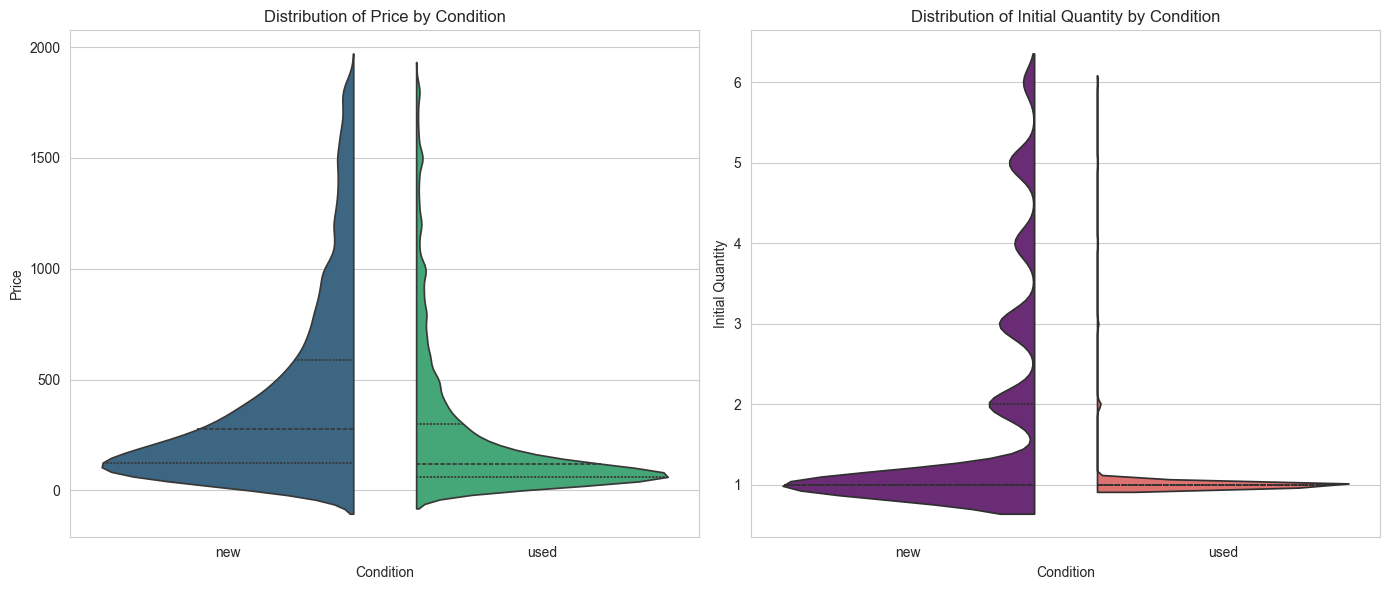

In [493]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# --- Plot for 'price' ---
plt.subplot(1, 2, 1)
sns.violinplot(
    x=y_train_df, 
    y='price',
    hue=y_train_df,
    data=X_train_outlier_df,
    palette='viridis',
    inner='quart',   # Changed from 'quartile' to 'quart' for brevity and common usage
    split=True,      # This enables the two-sided effect
    gap=.0001,          # Adds a small gap between the split halves
    legend=False     # Hide redundant legend
)
plt.title('Distribution of Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')

# --- Plot for 'initial_quantity' ---
plt.subplot(1, 2, 2)
sns.violinplot(
    x=y_train_df,
    y='initial_quantity',
    hue=y_train_df,
    data=X_train_outlier_df,
    palette='magma',
    inner='quart',
    split=True,
    gap=.0001,
    legend=False
)
plt.title('Distribution of Initial Quantity by Condition')
plt.xlabel('Condition')
plt.ylabel('Initial Quantity')

# Save the plot to a file
#plt.savefig('split_violin_plots.png')

plt.tight_layout()
plt.show()

- Almost every 'used' item has a quantity equal to 1 (as originally hypothesized).
- At lower values for `price`, there's no significant difference between target categories. For mid to higher values, the possibility of being 'new' increases.

## Escalado
Min-max scaling will be applied to continues values.

In [499]:
from sklearn.preprocessing import MinMaxScaler

X_train_scaled_df = X_train_outlier_df.copy().dropna()
X_test_scaled_df = X_test_outlier_df.copy().dropna()

# 1. Initialize the scaler
scaler = MinMaxScaler()

# 2. Fit the scaler to continuous data (learn min and max from training data)
scaler.fit(X_train_df[continuous_features])

# 3. Transform the continuous features
X_train_scaled_df[continuous_features] = scaler.transform(X_train_df[continuous_features])
X_test_scaled_df[continuous_features] = scaler.transform(X_train_df[continuous_features])

print("DataFrame after Min-Max Scaling:")
X_train_scaled_df[['price','initial_quantity']].describe()

DataFrame after Min-Max Scaling:


,price,initial_quantity
count,89990.000000,89990.000000
mean,0.000807,0.003397
std,0.008396,0.042120
min,0.000000,0.000000
25%,0.000014,0.000000
50%,0.000038,0.000000
75%,0.000123,0.000100
max,1.000000,1.000000


In [501]:
X_train_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89990 entries, 0 to 89989
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   seller_address                    0 non-null      object 
 1   warranty                          0 non-null      object 
 2   sub_status                        0 non-null      object 
 3   condition                         0 non-null      object 
 4   deal_ids                          0 non-null      object 
 5   base_price                        0 non-null      float64
 6   shipping                          0 non-null      object 
 7   non_mercado_pago_payment_methods  0 non-null      object 
 8   seller_id                         0 non-null      float64
 9   variations                        0 non-null      object 
 10  site_id                           0 non-null      object 
 11  listing_type_id                   0 non-null      object 
 12  pric

In [502]:
X_train_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64813 entries, 0 to 89999
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   seller_address                    64813 non-null  object 
 1   warranty                          24900 non-null  object 
 2   sub_status                        64813 non-null  object 
 3   condition                         64813 non-null  object 
 4   deal_ids                          64813 non-null  object 
 5   base_price                        64813 non-null  float64
 6   shipping                          64813 non-null  object 
 7   non_mercado_pago_payment_methods  64813 non-null  object 
 8   seller_id                         64813 non-null  int64  
 9   variations                        64813 non-null  object 
 10  site_id                           64813 non-null  object 
 11  listing_type_id                   64813 non-null  object 
 12  price    

### Concatenate to original dataframe

In [53]:
# 1. Identify non-continuous features from the original DataFrame
non_continuous_features = [col for col in X_train_df.columns if col not in continuous_features]

# 2. Select these non-continuous features
df_train_non_continuous = X_train_df[non_continuous_features]
df_test_non_continuous = X_test_df[non_continuous_features]

# 3. Rename columns in X_train_scaled_df to add '_scaled' suffix
X_train_scaled_df.drop(columns=non_continuous_features, inplace=True)  # Drop original continuous features
X_train_scaled_df_renamed = X_train_scaled_df.add_suffix('_scaled')

# 4. Apply the same transformation to the test set
X_test_scaled_df.drop(columns=non_continuous_features, inplace=True)  # Drop original continuous features
X_test_scaled_df_renamed = X_test_scaled_df.add_suffix('_scaled')

# 5. Concatenate the non-continuous features and the scaled features
X_train_df = pd.concat([df_train_non_continuous, X_train_scaled_df_renamed], axis=1)
X_test_df = pd.concat([df_test_non_continuous, X_test_scaled_df_renamed], axis=1)

## Binary Encoding

In [54]:
X_train_df['currency_id'].value_counts()

currency_id
ARS    88605
USD      504
Name: count, dtype: int64

In [55]:
# Create the new boolean feature 'is_USD'
X_train_df['is_USD'] = (X_train_df['currency_id'] == 'USD').astype('uint8') # as numeric type (1/0)
X_train_df.drop(columns=['currency_id'], inplace=True)

In [56]:
X_train_df['is_USD'].value_counts()

is_USD
0    88605
1      504
Name: count, dtype: int64

In [57]:
# Apply the same transformation to the test set
X_test_df['is_USD'] = (X_test_df['currency_id'] == 'USD').astype('uint8')
X_test_df.drop(columns=['currency_id'], inplace=True)

In [58]:
X_train_df

,seller_address,warranty,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,attributes,buying_mode,tags,parent_item_id,category_id,...,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,start_time,permalink,sold_quantity,available_quantity,price_scaled,initial_quantity_scaled,is_USD
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],80.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA6553902747,MLA126406,...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,None,NaN,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,3.562200e-08,0.000000,0
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],2650.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,[],buy_it_now,[],MLA7727150374,MLA10267,...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,None,NaN,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,1.192122e-06,0.000000,0
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],60.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA6561247998,MLA1227,...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,None,NaN,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,2.662200e-08,0.000000,0
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],580.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,[],buy_it_now,[],None,MLA86345,...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,None,NaN,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,2.606220e-07,0.000000,0
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],30.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA3133256685,MLA41287,...,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445638040000,active,None,NaN,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,1.312200e-08,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89104,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sin garantía,[],68.00,"{'local_pick_up': False, 'methods': [], 'tags'...",[],9451922715,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA1130924824,MLA1227,...,El Fin De Las Libertades - Benegas Lynch (h) -...,False,2015-10-02T13:36:50.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1448977010000,active,None,NaN,1443793010000,http://articulo.mercadolibre.com.ar/MLA1315520...,0,1,3.022200e-08,0.000000,0
89105,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],126.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",4665194056,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA1317691731,MLA45559,...,Honda Wave Guardabarro Interior Trasero,False,2015-09-22T23:30:21.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448148621000,paused,None,NaN,1442964621000,http://articulo.mercadolibre.com.ar/MLA6934

In [59]:
# Convert booleans into integers
for col in ['accepts_mercadopago', 'automatic_relist']:
    X_train_df[col] = X_train_df[col].dropna().astype('uint8')
    X_test_df[col] = X_test_df[col].dropna().astype('uint8')

## One-hot encoding
**(Categorical features)**

In [60]:
X_train_df['listing_type_id'].value_counts()

listing_type_id
bronze          56182
free            19139
silver           8154
gold_special     2690
gold             2166
gold_premium      765
gold_pro           13
Name: count, dtype: int64

Since these categories (bronze, free, etc.) don't have an inherent ordinal relationship (e.g., 'gold' isn't necessarily "greater" than 'silver' in a numerical sense that a model would understand without context, even if they represent tiers), one-hot encoding is a suitable choice.

In [61]:
X_train_df['buying_mode'].value_counts()

buying_mode
buy_it_now    86439
classified     1979
auction         691
Name: count, dtype: int64

In [62]:
X_train_df['status'].value_counts()

status
active            86116
paused             2992
not_yet_active        1
Name: count, dtype: int64

In [63]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns to encode
categorical_features = ['listing_type_id', 'buying_mode', 'status']

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

# Fit and transform the selected categorical columns
encoded_train_data = encoder.fit_transform(X_train_df[categorical_features])

# Create a DataFrame with the encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
ecoded_features = pd.DataFrame(encoded_train_data, columns=encoded_feature_names)

# Apply the same transformation to the test set
encoded_test_data = encoder.transform(X_test_df[categorical_features])
encoded_features_test = pd.DataFrame(encoded_test_data, columns=encoded_feature_names)

# Concatenate with the original DataFrame (dropping the original categorical columns)
X_train_transformed_df = pd.concat([X_train_df.drop(columns=categorical_features), ecoded_features], axis=1)
X_test_transformed_df = pd.concat([X_test_df.drop(columns=categorical_features), encoded_features_test], axis=1)

In [64]:
X_train_transformed_df.sample(5)  # Display a sample of the transformed training data

,seller_address,warranty,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,attributes,tags,parent_item_id,category_id,descriptions,last_updated,...,sold_quantity,available_quantity,price_scaled,initial_quantity_scaled,is_USD,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_buy_it_now,buying_mode_classified,status_not_yet_active,status_paused
55899,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],450.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",7015102226,[{'attribute_combinations': [{'value_id': '920...,MLA,"[{'value_id': 'male', 'attribute_group_id': 'D...",[dragged_bids_and_visits],MLA2734541597,MLA109391,[{'id': 'MLA4389231933-944316811'}],2015-10-14T16:01:28.000Z,...,0,1,2.021220e-07,0.0000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38258,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],329.0,"{'local_pick_up': False, 'methods': [], 'tags'...","[{'description': 'Transferencia bancaria', 'id...",5017703063,[],MLA,[],[dragged_bids_and_visits],MLA5989810972,MLA25930,[{'id': 'MLA9236403640-935979488'}],2015-10-02T21:55:53.000Z,...,2,5,1.476720e-07,0.0004,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27583,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],235.0,"{'local_pick_up': True, 'methods': [], 'tags':...",[],3044275186,[],MLA,[],[dragged_bids_and_visits],MLA3931342899,MLA95417,[{'id': 'MLA5304646212-937513973'}],2015-10-05T12:55:27.000Z,...,0,1,1.053720e-07,0.0000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59305,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],55.0,"{'local_pick_up': False, 'methods': [], 'tags'...",[],6313816363,[],MLA,[],[dragged_bids_and_visits],MLA2390260424,MLA8649,[{'id': 'MLA2872430671-905675368'}],2015-08-28T01:54:18.000Z,...,0,1,2.437200e-08,0.0000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19849,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],1.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",3562914479,[],MLA,[],[],None,MLA1948,[{'id': 'MLA8134790813-924761999'}],2015-10-02T00:24:07.338Z,...,0,1,7.200000e-11,0.0000,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Final result

In [65]:
before_len = len(X_train_df.columns)
after_len = len(X_train_transformed_df.columns)
dif_len = after_len - before_len
print("Number of features:")
print(f" - Before transformations: {before_len}")
print(f" - After transformations: {after_len}")
print(f"Increase of {dif_len} features ({(dif_len/before_len):.2%})")

Number of features:
 - Before transformations: 38
 - After transformations: 45
Increase of 7 features (18.42%)


In [66]:
before_len = len(X_test_df.columns)
after_len = len(X_test_transformed_df.columns)
dif_len = after_len - before_len
print("Number of features:")
print(f" - Before transformations: {before_len}")
print(f" - After transformations: {after_len}")
print(f"Increase of {dif_len} features ({(dif_len/before_len):.2%})")

Number of features:
 - Before transformations: 38
 - After transformations: 45
Increase of 7 features (18.42%)


# 3. Feature Selection

In [67]:
# Store all features in a list
features = X_train_transformed_df.columns.tolist()

During missing values analysis it was noticed that these variables were problematic:
`site_id`,`video_id`, `official_store_id`, `original_price`, `catalog_product_id`,`deal_ids`

In [ ]:
features

['price',
 'accepts_mercadopago',
 'automatic_relist',
 'stop_time',
 'status',
 'initial_quantity',
 'start_time',
 'price_scaled',
 'is_USD',
 'listing_type_id_free',
 'listing_type_id_gold',
 'listing_type_id_gold_premium',
 'listing_type_id_gold_pro',
 'listing_type_id_gold_special',
 'listing_type_id_silver',
 'buying_mode_buy_it_now',
 'buying_mode_classified',
 'free_tier',
 'time_created',
 'day_of_week',
 'is_weekend',
 'is_working_hours',
 'quant_single_unit',
 'quant_small',
 'has_parent_item',
 'has_store',
 'high_ticket',
 'duration',
 'is_single_unit']

In [410]:
# As it was stated before, ID variables will be ignored during feature selection.
# Also, time-related and tags variables won't be used.
id_variables = ['id', 'parent_item_id', 'official_store_id', 'category_id', 'site_id', 'video_id', 'catalog_product_id', 'deal_ids', 'seller_id', 'descriptions']
time_variables = ['date_created', 'last_updated'] #'start_time', 'stop_time', 
tag_variables = ['tags', 'variations', 'shipping', 'attributes', 'non_mercado_pago_payment_methods']
post_related_variables = ['title', 'permalink', 'secure_thumbnail', 'thumbnail', 'pictures'] 

In [ ]:
# Remove specific features that are not needed for the analysis
[features.remove(x) for x in (id_variables + time_variables + tag_variables + post_related_variables)]

# Remove other specific features that are not relevant for the analysis
other_features = ['original_price', 'base_price', 'warranty', 'seller_address', 'sold_quantity', 'available_quantity']
[features.remove(x) for x in other_features]

# Show the selected features
print(f"Selected features ({len(features)}):")
str(features)

**Criteria:**
* **Highly correlated features:**
    * **Quantity:** Only `initial_quantity` will be used. The hypothesis is that it could serve to differentiate brand-new items because usually there are more than one available.
    * **Price:** Only `price` will be used.
* **Unrelated features:**
    * Seller address is not relevant for our target.
    * Warranty has a lot of missing values, and there is a lot of diversity of arbitrary values; it's difficult to extract useful information from this feature.
    * Post-related features.

In [74]:
X_train_transformed_df[features].columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled',
       'initial_quantity_scaled', 'is_USD', 'listing_type_id_free',
       'listing_type_id_gold', 'listing_type_id_gold_premium',
       'listing_type_id_gold_pro', 'listing_type_id_gold_special',
       'listing_type_id_silver', 'buying_mode_buy_it_now',
       'buying_mode_classified', 'status_not_yet_active', 'status_paused'],
      dtype='object')

# 4. Predictive capabilities

### Predictiveness

In [76]:
features

['accepts_mercadopago',
 'automatic_relist',
 'price_scaled',
 'initial_quantity_scaled',
 'is_USD',
 'listing_type_id_free',
 'listing_type_id_gold',
 'listing_type_id_gold_premium',
 'listing_type_id_gold_pro',
 'listing_type_id_gold_special',
 'listing_type_id_silver',
 'buying_mode_buy_it_now',
 'buying_mode_classified',
 'status_not_yet_active',
 'status_paused']

In [77]:
# Get the numerical columns
numerical_features = X_train_transformed_df[features].select_dtypes(include=['number','bool']).columns.tolist()

print("Numerical features for filtering:")
print(numerical_features)

Numerical features for filtering:
['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'initial_quantity_scaled', 'is_USD', 'listing_type_id_free', 'listing_type_id_gold', 'listing_type_id_gold_premium', 'listing_type_id_gold_pro', 'listing_type_id_gold_special', 'listing_type_id_silver', 'buying_mode_buy_it_now', 'buying_mode_classified', 'status_not_yet_active', 'status_paused']


In [78]:
# Join X_train_transformed_df with y_train_df for correlation analysis
df_corr = X_train_transformed_df[numerical_features].copy()
df_corr['target'] = y_train_df.reset_index(drop=True)

# If 'target' is categorical, encode it for correlation calculation
df_corr['target_encoded'] = (df_corr['target'] == 'new').astype(int)

# Compute correlation with the target
print("CORRELATION")
correlations = df_corr.corr(numeric_only=True)['target_encoded'].sort_values(ascending=False)
correlations[1:]  # Exclude the target itself from the results

CORRELATION


automatic_relist                0.187453
listing_type_id_silver          0.168811
listing_type_id_gold_special    0.156955
listing_type_id_gold            0.102546
buying_mode_buy_it_now          0.099804
accepts_mercadopago             0.092842
initial_quantity_scaled         0.071924
status_paused                   0.067348
listing_type_id_gold_pro        0.011214
status_not_yet_active           0.003110
listing_type_id_gold_premium    0.001252
price_scaled                   -0.000968
is_USD                         -0.025116
buying_mode_classified         -0.092842
listing_type_id_free           -0.485303
Name: target_encoded, dtype: float64

`status` is not adding any predictive value. It's mostly unbalanced ('active' value) and doesn't add relevant information.

In [299]:
print("PREDICTIVENESS")
predictiveness = abs(correlations[1:]).sort_values(ascending=False)
predictiveness

PREDICTIVENESS


listing_type_id_free            0.485303
automatic_relist                0.187453
listing_type_id_silver          0.168811
listing_type_id_gold_special    0.156955
listing_type_id_gold            0.102546
buying_mode_buy_it_now          0.099804
accepts_mercadopago             0.092842
buying_mode_classified          0.092842
status_paused                   0.067348
is_USD                          0.025116
listing_type_id_gold_pro        0.011214
status_not_yet_active           0.003110
listing_type_id_gold_premium    0.001252
Name: target_encoded, dtype: float64

In [303]:
print(f"Best predictor for 'new' items is '{predictiveness.idxmax()}', while worst is '{predictiveness.idxmin()}'")

Best predictor for 'new' items is 'listing_type_id_free', while worst is 'listing_type_id_gold_premium'


It's evident that there's a clear correlation between 'free' seller-users (who mostly sell used items) and paying sellers (actual businesses offering new items). Interestingly, the **'gold_premium' tier is not a good predictor.**

In [304]:
df_corr.drop(columns=['target'], inplace=True)  # Ensure 'target_encoded' is not in df_corr before adding it

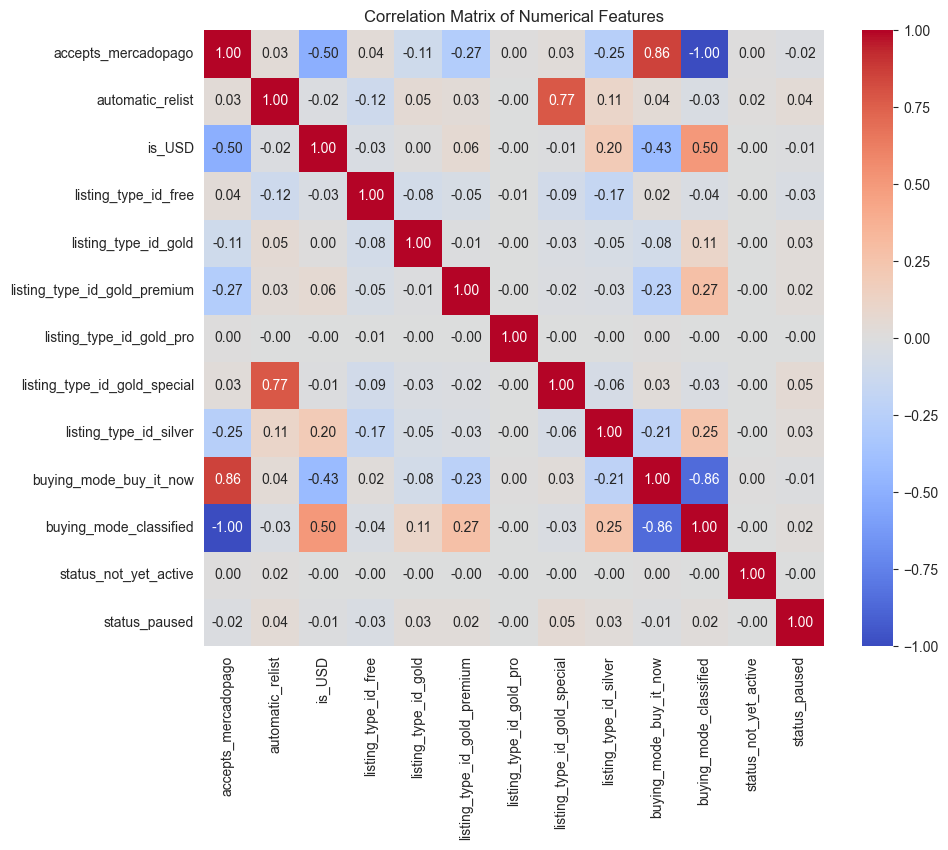

In [334]:
# Compute correlation matrix for numerical features
corr_matrix = df_corr[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

---
---
# Model Design *(productive cycle)*

# 2º iteration

## Grouping dummies `listing_type_id`

In [83]:
# Find dummy variables for feature
[feature for feature in features if feature.startswith('listing_type_id')]

['listing_type_id_free',
 'listing_type_id_gold',
 'listing_type_id_gold_premium',
 'listing_type_id_gold_pro',
 'listing_type_id_gold_special',
 'listing_type_id_silver']

In [84]:
num_paid_users = X_train_df['listing_type_id'].value_counts().tolist()
num_paid_users.pop(1)
print(f"Remacably, {sum(num_paid_users)/len(X_train_df):.1%} are paid users.")

Remacably, 78.5% are paid users.


In [85]:
X_train_transformed_df['free_tier'] = X_train_transformed_df['listing_type_id_free'] == True

---
# 3º iteration

### Datetime -> `is_weekend` & `is_working_hours`  (Synthetic feature)

In [86]:
X_train_df['date_created'].sample()

73935    2015-09-15T22:34:13.000Z
Name: date_created, dtype: object

In [87]:
test_df = X_train_df.copy()

# Convert 'date_created' to datetime objects
# The 'T' and 'Z' indicate time and UTC timezone, respectively,
# which pandas handles automatically with 'infer_datetime_format=True'
test_df['date_created_dt'] = pd.to_datetime(test_df['date_created'], infer_datetime_format=True)

# Create the 'time_created' feature (hour of the day)
test_df['time_created'] = test_df['date_created_dt'].dt.hour

# Create the 'day_of_week' feature (0=Monday, 6=Sunday)
test_df['day_of_week'] = test_df['date_created_dt'].dt.dayofweek

# Drop the original 'date_created' (str) and intermediate datetime column
test_df = test_df.drop(columns=['date_created', 'date_created_dt'])

/var/folders/83/9353kc_5517028y13dxby8y40000gn/T/ipykernel_58840/820055625.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  test_df['date_created_dt'] = pd.to_datetime(test_df['date_created'], infer_datetime_format=True)


In [88]:
test_df[['time_created','day_of_week']].sample(5)  # Display a sample of the transformed test data

,time_created,day_of_week
88471,1,1
20975,1,5
49022,18,2
24534,3,5
64954,10,1


In [89]:
# 1. Create 'is_weekend' feature
# Days of the week are 0=Monday, 1=Tuesday, ..., 4=Friday, 5=Saturday, 6=Sunday
# So, Saturday (5) and Sunday (6) are weekends.
test_df['is_weekend'] = test_df['day_of_week'].isin([5, 6]).astype(int)

# 2. Create 'is_working_hours' feature
# Working hours are between 6 AM (inclusive) and 8 PM (inclusive)
# This means hours 6, 7, ..., 20.
test_df['is_working_hours'] = (
    (test_df['time_created'] >= 6) &
    (test_df['time_created'] <= 20)
).astype(int)

In [90]:
idx = test_df.sample(5).index
print(y_train_df.iloc[idx])
test_df[['time_created','is_working_hours','day_of_week','is_weekend']].iloc[idx] 


7333      new
81408    used
50637     new
21824    used
50766     new
dtype: object


,time_created,is_working_hours,day_of_week,is_weekend
7260,12,1,0,0
80604,22,0,5,1
50151,12,1,2,0
21618,0,0,2,0
50279,11,1,6,1


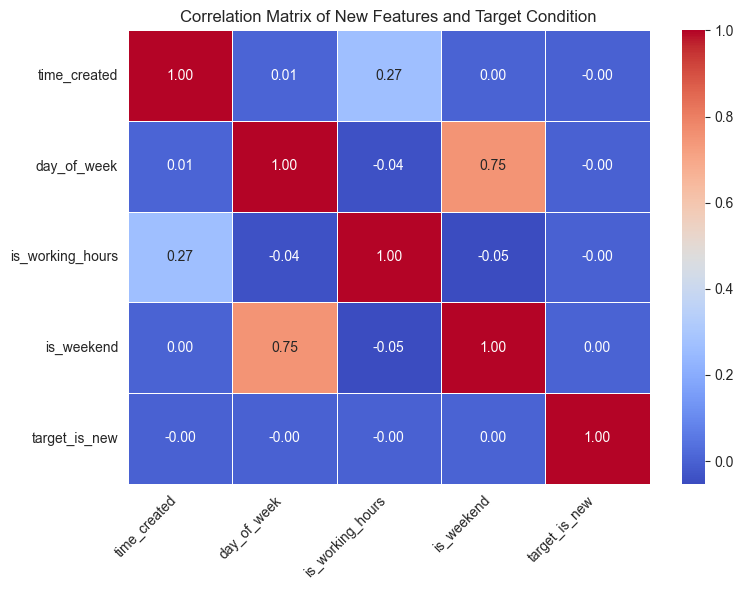

Correlation with 'target_is_new' (where 'new'=1, 'used'=0):
target_is_new       1.000000
is_weekend          0.001865
day_of_week        -0.000202
time_created       -0.000969
is_working_hours   -0.003129
Name: target_is_new, dtype: float64


In [93]:
# Understanding correlation with the target variable

target_numerical = y_train_df.map({'new': 1, 'used': 0})
correlation_df = test_df[['time_created', 'day_of_week', 'is_working_hours', 'is_weekend']].copy()
correlation_df['target_is_new'] = target_numerical
correlation_matrix = correlation_df.corr()

# Graph
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Matrix of New Features and Target Condition')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig('new_features_correlation_heatmap.png')
plt.show()

print("Correlation with 'target_is_new' (where 'new'=1, 'used'=0):")
print(correlation_matrix['target_is_new'].sort_values(ascending=False))

While the correlation matrix might suggest that 'used' items tend to be posted more during weekends and non-working hours, this observation lacks statistical significance.

Sadly, day or time do not appear to have a significant correlation with `target_condition`, rendering them less useful targets.

---

In [109]:
remove = ['listing_type_id_free',
 'listing_type_id_gold',
 'listing_type_id_gold_premium',
 'listing_type_id_gold_pro',
 'listing_type_id_gold_special',
 'listing_type_id_silver']

for feat in remove:
    features.remove(feat)

In [ ]:
X_train_transformed_df['free_tier'] = X_train_transformed_df['listing_type_id_free'] == True
X_test_transformed_df['free_tier'] = X_test_transformed_df['listing_type_id_free'] == True
features.append('free_tier')

In [111]:
X_train_transformed_df[features].columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled',
       'initial_quantity_scaled', 'is_USD', 'buying_mode_buy_it_now',
       'buying_mode_classified', 'status_not_yet_active', 'status_paused',
       'free_tier'],
      dtype='object')

In [112]:
# Get the numerical columns
numerical_features = X_train_transformed_df[features].select_dtypes(include=['number','bool']).columns.tolist()

print("Numerical features for filtering:")
print(numerical_features)

Numerical features for filtering:
['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'initial_quantity_scaled', 'is_USD', 'buying_mode_buy_it_now', 'buying_mode_classified', 'status_not_yet_active', 'status_paused', 'free_tier']


In [113]:
# Join X_train_transformed_df with y_train_df for correlation analysis
df_corr = X_train_transformed_df[numerical_features].copy()
df_corr['target'] = y_train_df.reset_index(drop=True)

# If 'target' is categorical, encode it for correlation calculation
df_corr['target_encoded'] = (df_corr['target'] == 'new').astype(int)

# Compute correlation with the target
print("CORRELATION")
correlations = df_corr.corr(numeric_only=True)['target_encoded'].sort_values(ascending=False)
correlations[1:]  # Exclude the target itself from the results

CORRELATION


automatic_relist           0.187453
buying_mode_buy_it_now     0.099804
accepts_mercadopago        0.092842
initial_quantity_scaled    0.071924
status_paused              0.067348
status_not_yet_active      0.003110
price_scaled              -0.000968
is_USD                    -0.025116
buying_mode_classified    -0.092842
free_tier                 -0.485303
Name: target_encoded, dtype: float64

`status` is not adding any predictive value. It's mostly unbalanced ('active' value) and doesn't add relevant information.

In [114]:
print("PREDICTIVENESS")
predictiveness = abs(correlations[1:]).sort_values(ascending=False)
predictiveness

PREDICTIVENESS


free_tier                  0.485303
automatic_relist           0.187453
buying_mode_buy_it_now     0.099804
accepts_mercadopago        0.092842
buying_mode_classified     0.092842
initial_quantity_scaled    0.071924
status_paused              0.067348
is_USD                     0.025116
status_not_yet_active      0.003110
price_scaled               0.000968
Name: target_encoded, dtype: float64

In [115]:
print(f"Best predictor for 'new' items is '{predictiveness.idxmax()}', while worst is '{predictiveness.idxmin()}'")

Best predictor for 'new' items is 'free_tier', while worst is 'price_scaled'


---
# 6º iteration

## Categorical `quantity`

In [116]:
X_train_df.columns

Index(['seller_address', 'warranty', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'site_id', 'listing_type_id', 'attributes', 'buying_mode', 'tags',
       'parent_item_id', 'category_id', 'descriptions', 'last_updated',
       'pictures', 'id', 'official_store_id', 'accepts_mercadopago',
       'original_price', 'thumbnail', 'title', 'automatic_relist',
       'date_created', 'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'start_time', 'permalink', 'sold_quantity',
       'available_quantity', 'price_scaled', 'initial_quantity_scaled',
       'is_USD'],
      dtype='object')

In [152]:
quantity = pd.DataFrame(X_train)['initial_quantity']

In [153]:
def categorize_quantity(quantity_value):
    if quantity_value == 1:
        return 'single_unit'
    elif 1 < quantity_value < 10:
        return 'small'
    else: # value >= 10 or value <= 0 (assuming quantity can't be negative in real scenario)
        return 'large'
    
df_test = X_train_transformed_df.copy()
df_test['quantity_category'] = quantity.apply(categorize_quantity)
df_test['quantity_category']

0        single_unit
1        single_unit
2        single_unit
3        single_unit
4        single_unit
            ...     
89104    single_unit
89105          large
89106          large
89107          small
89108    single_unit
Name: quantity_category, Length: 89109, dtype: object

In [154]:
# Apply one-hot encoding to the 'quantity_category' column
df_test = pd.get_dummies(df_test, columns=['quantity_category'], prefix='quant', drop_first=False)

In [155]:
df_test[['quant_single_unit','quant_small']].sample(5)

,quant_single_unit,quant_small
84962,True,False
56390,True,False
78027,True,False
78860,False,False
7173,True,False


In [156]:
# Store new features names
quant_feat = [x for x in df_test.columns.to_list() if x.startswith('quant')]
quant_feat

['quant_large', 'quant_single_unit', 'quant_small']

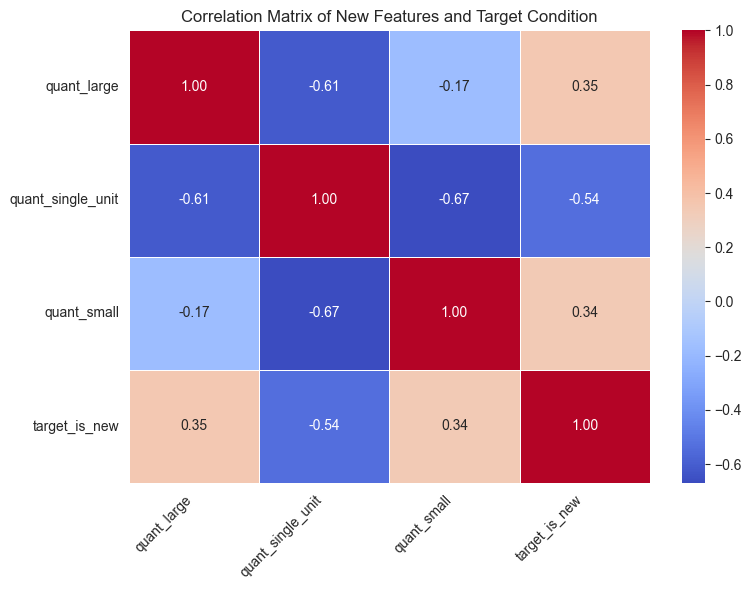

Correlation with 'target_is_new' (where 'new'=1, 'used'=0):
target_is_new        1.000000
quant_large          0.350855
quant_small          0.340787
quant_single_unit   -0.537574
Name: target_is_new, dtype: float64


In [157]:
# Understanding correlation with the target variable

target_numerical = y_train_df.map({'new': 1, 'used': 0})
correlation_df = df_test[quant_feat].copy()
correlation_df['target_is_new'] = target_numerical
correlation_matrix = correlation_df.corr()

# Graph
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Matrix of New Features and Target Condition')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig('new_features_correlation_heatmap.png')
plt.show()

print("Correlation with 'target_is_new' (where 'new'=1, 'used'=0):")
print(correlation_matrix['target_is_new'].sort_values(ascending=False))

As we can see, there's a clear correlation between target and quant_single_unit, but not for the others. So, it makes sense to  keep just a categorical feature `single_unit` instead.

In [158]:
df_test['is_single_unit'] = quantity == 1
df_test['is_single_unit']

0         True
1         True
2         True
3         True
4         True
         ...  
89104     True
89105    False
89106    False
89107    False
89108     True
Name: is_single_unit, Length: 89109, dtype: bool

---
# 7º iteration

For this iteration, I'll create new synthetic features to discover hidden patterns related to the target.

### 'parent_item_id'

In [393]:
X_train_df['parent_item_id'].isnull().sum()

np.int64(20685)

In [394]:
X_train_df['has_parent_item'] = ~X_train_df['parent_item_id'].isnull()

In [395]:
# Now check the counts for this newly created column
X_train_df['has_parent_item'].value_counts()

has_parent_item
True     69305
False    20685
Name: count, dtype: int64

### 'has_store'

In [ ]:
X_train_df['official_store_id'].isnull().sum()

np.int64(89245)

In [397]:
X_train_df['has_store'] = ~X_train_df['official_store_id'].isnull()

In [398]:
# Now check the counts for this newly created column
X_train_df['has_store'].value_counts()

has_store
False    89245
True       745
Name: count, dtype: int64

### Categorical 'price'

In [399]:
X_train_df['price'].max() # Max price was capped eralier (during outliers handling)

np.float64(6500000.0)

In [400]:
# 1º Calculate the 75th percentile (Q3) of the 'price' column
q3_price = X_train_df['price'].quantile(0.75)

print(f"\n75th percentile (Q3) of 'price': {q3_price:.2f}")

# 2º Create the 'high_ticket' column 
# 'high_ticket' will be True if 'price' is greater than Q3, False otherwise
X_train_df['high_ticket'] = X_train_df['price'] > q3_price


75th percentile (Q3) of 'price': 800.00


Threshold was set for product prices higher than ~80 USD (2015)

In [401]:
X_train_df['high_ticket'].value_counts()

high_ticket
False    67660
True     22330
Name: count, dtype: int64

---
# 11º iteration

### 'stop_time' - 'start_time' -> `duration` (Synthetic feature)

In [ ]:
# Concat with target
y_train_df.name = 'target'
time_df = pd.concat([X_train_df, y_train_df], axis=1)

In [ ]:
time_df['duration'] = time_df['stop_time'] - time_df['start_time']

In [ ]:
time_df['duration'].describe()

count    8.910900e+04
mean     5.266197e+09
std      3.319681e+09
min      2.170670e+08
25%      5.184000e+09
50%      5.184000e+09
75%      5.184000e+09
max      2.986893e+11
Name: duration, dtype: float64

/var/folders/83/9353kc_5517028y13dxby8y40000gn/T/ipykernel_58840/486364388.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Target')


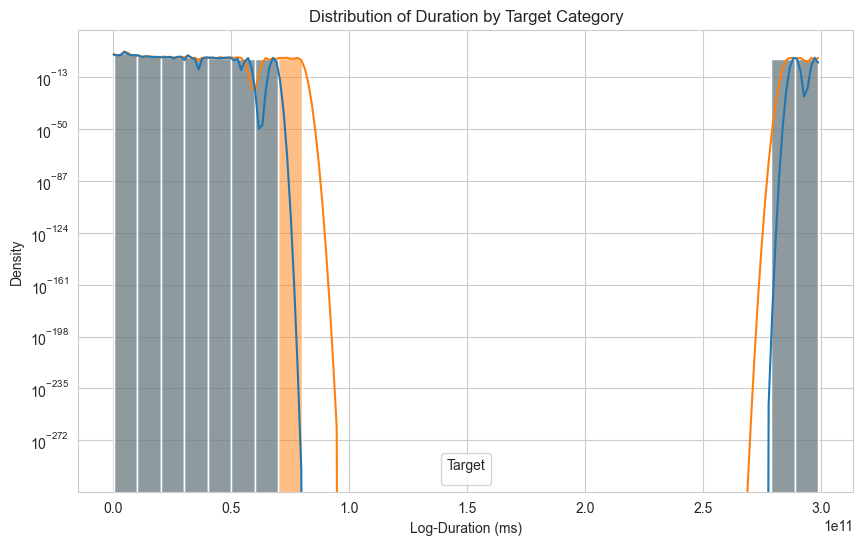

In [ ]:
# Convert target to a categorical type for hue 
time_df['target'] = time_df['target'].astype('category')

# Plotting the distribution of 'duration' with 'target' as hue
plt.figure(figsize=(10, 6))
#sns.kdeplot(data=time_df, x='duration', hue='target', fill=True, alpha=0.7, common_norm=False)
sns.histplot(data=time_df, x='duration', hue='target',  kde=True, bins=30)
plt.title('Distribution of Duration by Target Category')
plt.xlabel('Log-Duration (ms)')
plt.ylabel('Density')
plt.yscale('log')
plt.legend(title='Target')
plt.show()

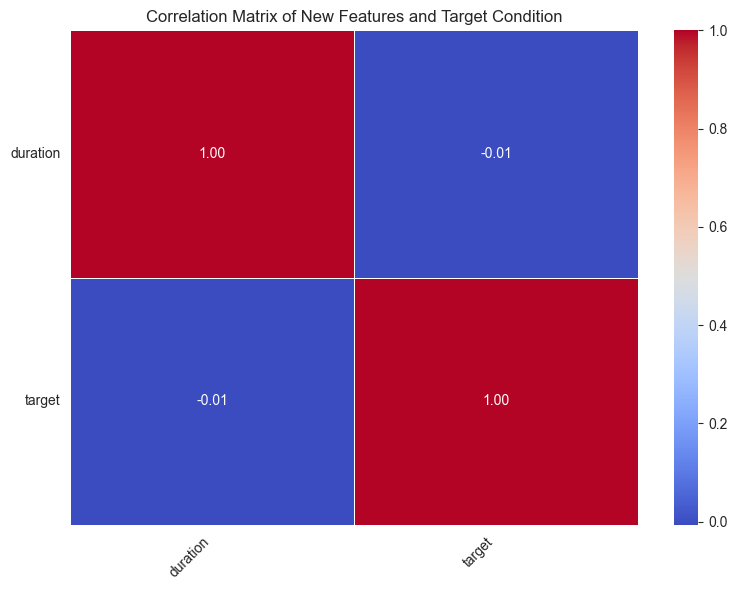

Correlation with 'target' (where 'new'=1, 'used'=0):
target      1.000000
duration   -0.006236
Name: target, dtype: float64


In [ ]:
# Understanding correlation with the target variable

time_df['target'] = time_df['target'].map({'new': 1, 'used': 0})
selection = ['duration','target']
correlation_matrix = time_df[selection].corr()

# Graph
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Matrix of New Features and Target Condition')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig('new_features_correlation_heatmap.png')
plt.show()

print("Correlation with 'target' (where 'new'=1, 'used'=0):")
print(correlation_matrix['target'].sort_values(ascending=False))

There's no correlation between post duration and target, so it's probably not a good predictor.

---
# 13º iteration
## Encoding `tags`

In [506]:
# Flatten all tag lists and get unique tag values
unique_tags = set(tag for tags_list in X_train_df['tags'] for tag in tags_list)
print(f"Unique tags identified: {unique_tags}\n")

# Create new features for each unique tag
for tag in unique_tags:
    # For each row, check if the tag is present in the 'tags' list
    # and create a new binary column (1 if present, 0 if not)
    X_train_df[f'tag_{tag}'] = X_train_df['tags'].apply(lambda x: 1 if tag in x else 0)

Unique tags identified: {'good_quality_thumbnail', 'dragged_bids_and_visits', 'dragged_visits', 'poor_quality_thumbnail', 'free_relist'}



In [430]:
X_train_df.head()

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,...,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity,has_parent_item,has_store,high_ticket,tag_good_quality_thumbnail,tag_dragged_bids_and_visits,tag_dragged_visits,tag_poor_quality_thumbnail,tag_free_relist
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,80.0,[],buy_it_now,...,NaN,None,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,True,False,False,0,1,0,0,0
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,2650.0,[],buy_it_now,...,NaN,None,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,True,False,True,0,0,0,0,0
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,60.0,[],buy_it_now,...,NaN,None,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,True,False,False,0,1,0,0,0
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,580.0,[],buy_it_now,...,NaN,None,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,False,False,False,0,0,0,0,0
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],used,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,bronze,30.0,[],buy_it_now,...,NaN,None,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,True,False,False,0,1,0,0,0


## Encoding `shipping`

In [504]:
X_train_df['shipping'].sample().to_list()

[{'local_pick_up': True,
  'methods': [],
  'tags': [],
  'free_shipping': False,
  'mode': 'me2',
  'dimensions': None}]

In [523]:
# 2. Extract 'local_pick_up' and 'free_shipping' values and create new features
# We use .apply(lambda x: ...) to process each list in the 'shipping' column.
# We access the first dictionary in the list (x[0]) and then the specific keys.

# Function to safely extract values
def get_shipping_feature(shipping_list, feature_name):
    # Check if the entry is a list and not empty
    if isinstance(shipping_list, list) and len(shipping_list) > 0:
        # Check if the first element is a dictionary and contains the key
        if isinstance(shipping_list[0], dict) and feature_name in shipping_list[0]:
            return shipping_list[0][feature_name]
    # Return NaN or a default value if conditions are not met
    return 0 # Or False, 0, or any other suitable default

# Apply the safe extraction function
X_train_df['local_pick_up'] = X_train_df['shipping'].apply(lambda x: get_shipping_feature(x, 'local_pick_up'))
X_train_df['free_shipping'] = X_train_df['shipping'].apply(lambda x: get_shipping_feature(x, 'free_shipping'))

# Convert boolean values to integers (0 or 1), handling NaNs if necessary
# .fillna(0) will convert NaN to 0 before converting to int
X_train_df['local_pick_up'] = X_train_df['local_pick_up'].fillna(0).astype(int)
X_train_df['free_shipping'] = X_train_df['free_shipping'].fillna(0).astype(int)

In [524]:
X_train_df.head()

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,...,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity,local_pick_up,free_shipping,tag_good_quality_thumbnail,tag_dragged_bids_and_visits,tag_dragged_visits,tag_poor_quality_thumbnail,tag_free_relist
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,80.0,[],buy_it_now,...,None,NaN,None,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,0,0,0,1,0,0,0
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,2650.0,[],buy_it_now,...,None,NaN,None,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,0,0,0,0,0,0,0
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,60.0,[],buy_it_now,...,None,NaN,None,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,0,0,0,1,0,0,0
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,580.0,[],buy_it_now,...,None,NaN,None,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,0,0,0,0,0,0,0
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],used,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,bronze,30.0,[],buy_it_now,...,None,NaN,None,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,0,0,0,1,0,0,0


In [555]:
new_features = ['is_dragged_true','tag_good_quality_thumbnail','tag_dragged_bids_and_visits','tag_dragged_visits','tag_poor_quality_thumbnail','tag_free_relist','local_pick_up','free_shipping']
X_train_df[new_features].isna().sum()

is_dragged_true                0
tag_good_quality_thumbnail     0
tag_dragged_bids_and_visits    0
tag_dragged_visits             0
tag_poor_quality_thumbnail     0
tag_free_relist                0
local_pick_up                  0
free_shipping                  0
dtype: int64

### Predictiveness

In [556]:
# Join X_train_transformed_df with y_train_df for correlation analysis
df_corr = X_train_df[new_features].copy()
df_corr['target'] = y_train_df.reset_index(drop=True)

# If 'target' is categorical, encode it for correlation calculation
df_corr['target_encoded'] = (df_corr['target'] == 'new').astype(int)

# Compute correlation with the target
print("CORRELATION")
correlations = df_corr.corr(numeric_only=True)['target_encoded'].sort_values(ascending=False)
correlations[1:]  # Exclude the target itself from the results

CORRELATION


tag_good_quality_thumbnail     0.092405
tag_poor_quality_thumbnail     0.011155
tag_dragged_bids_and_visits   -0.003176
is_dragged_true               -0.013762
tag_dragged_visits            -0.051492
tag_free_relist               -0.053490
local_pick_up                       NaN
free_shipping                       NaN
Name: target_encoded, dtype: float64

`status` is not adding any predictive value. It's mostly unbalanced ('active' value) and doesn't add relevant information.

In [557]:
print("PREDICTIVENESS")
predictiveness = abs(correlations[1:]).sort_values(ascending=False)
predictiveness

PREDICTIVENESS


tag_good_quality_thumbnail     0.092405
tag_free_relist                0.053490
tag_dragged_visits             0.051492
is_dragged_true                0.013762
tag_poor_quality_thumbnail     0.011155
tag_dragged_bids_and_visits    0.003176
local_pick_up                       NaN
free_shipping                       NaN
Name: target_encoded, dtype: float64

In [553]:
X_train_df['is_dragged_true'] = (X_train_df['tag_dragged_visits'] | X_train_df['tag_dragged_bids_and_visits'])